Text(0.5, 1.0, 'Barcelona Shot Map')

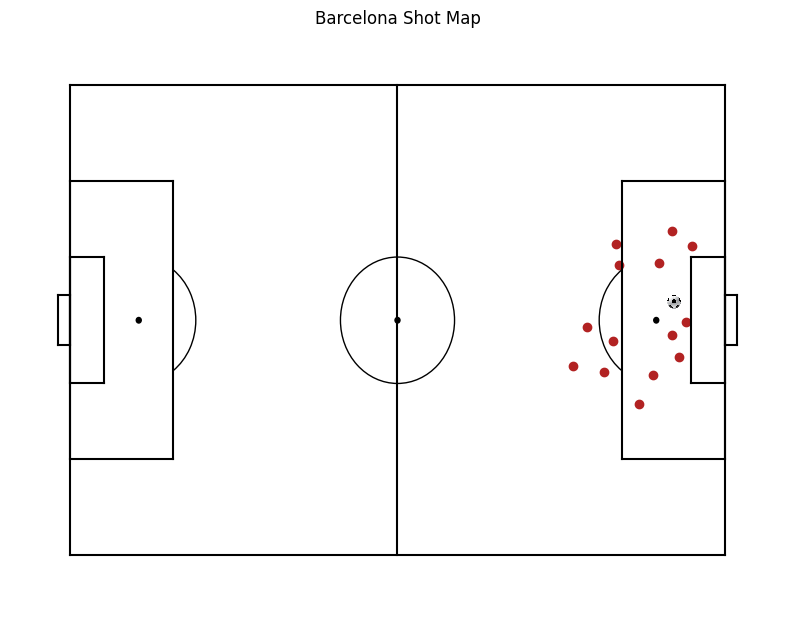

In [3]:
# Shot Maps
import matplotsoccer
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.pyplot as plt
from main_data import main_content

shots_data = main_content['shotmap']['shots']

first_team_shots = []
second_team_shots = []
path = './ball.png'
image = plt.imread(path)
# Barcelona shot map
for el in shots_data:
    if el['teamId'] != 8633:
        first_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'eventType': el['eventType'], 'color': 'green' if el['eventType'] == 'Goal' else 'firebrick'})
    else:
        second_team_shots.append(
            {'x': el['x'], 'y': el['y'], 'eventType': el['eventType'], 'color': 'green' if el['eventType'] == 'Goal' else 'skyblue'})

matplotsoccer.field("white", figsize=10, show=False)

for el in first_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.02), (el['x'], el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'],
                linewidths=1)

plt.title('Barcelona Shot Map')

Text(0.5, 1.0, 'Real Madrid Shot Map')

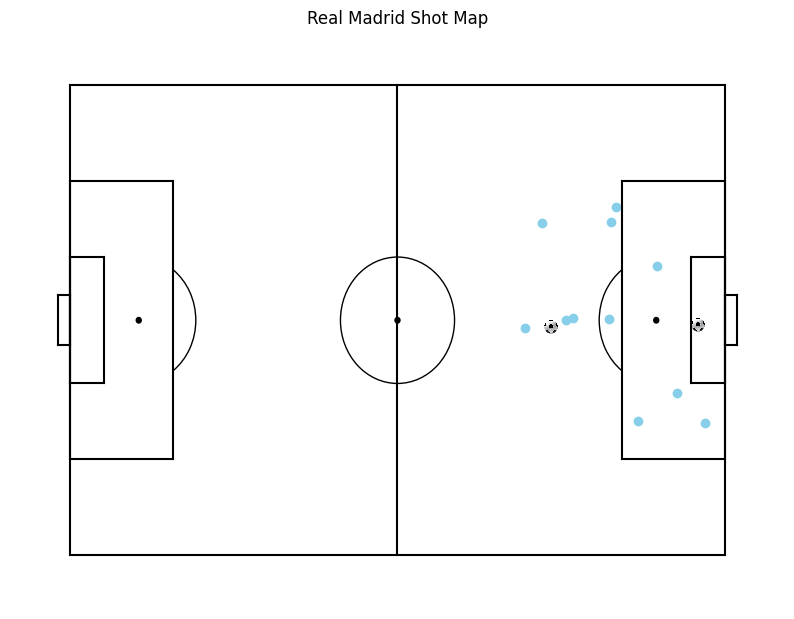

In [5]:
# Real Madrid shot map
matplotsoccer.field("white", figsize=10, show=False)
for el in second_team_shots:
    if el['eventType'] == 'Goal':
        ab = AnnotationBbox(
            OffsetImage(image, zoom=0.02), (el['x'], el['y']), frameon=False)
        plt.gca().add_artist(ab)
    plt.scatter(el['x'], el['y'], color=el['color'], linewidths=1)

plt.title('Real Madrid Shot Map')